In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

## Assumptions Made

Normalized data using annual SF population

## Dogpatch/Mission Bay/ Population Metrics

In [2]:
sf_pop = {'2020': 884363, '2019': 881549, '2018': 883305, '2017': 884363, '2016': 883305, '2015': 864816, 
          '2014': 852469,'2013': 837442, '2012': 825865, '2011': 812826, '2010': 805463, 
          '2009': 774347,'2008': 767067, '2007': 758348, '2006': 751431, '2005': 748846, 
          '2004': 750133,'2003': 757638, '2002': 755862, '2001': 777613, '2000': 777340}
year=[]
pop=[]
for key, val in sf_pop.items():
    year.append(int(key))
    pop.append(int(val))
d={'year': year, 'pop': pop}
sf_pop_df = pd.DataFrame(d).sort_values('year')

# SF Fire Department Calls EDA
**Results/Notes: Useful, proceed. Limit to Mission Bay & Dogpatch zipcodes**

In [5]:
fire_calls=pd.read_csv('DataSets/Stadium Impact/Fire_Department_Calls_for_Service.csv')
fire_calls.head()

/Users/sherryduong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods (old),Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Central Market/Tenderloin Boundary Polygon - Updated
0,192042427,E38,19086811,Alarms,07/23/2019,07/23/2019,07/23/2019 03:10:08 PM,07/23/2019 03:11:38 PM,07/23/2019 03:11:44 PM,07/23/2019 03:13:19 PM,...,1.0,13.0,6.0,30.0,28858.0,27.0,9.0,NaN,NaN,NaN
1,191790072,T01,19076289,Alarms,06/28/2019,06/27/2019,06/28/2019 12:48:55 AM,06/28/2019 12:50:31 AM,06/28/2019 12:50:59 AM,06/28/2019 12:51:11 AM,...,9.0,14.0,10.0,36.0,28852.0,36.0,10.0,1.0,NaN,1.0
2,192634045,T07,19112815,Structure Fire,09/20/2019,09/20/2019,09/20/2019 08:36:21 PM,09/20/2019 08:36:21 PM,09/20/2019 08:36:30 PM,09/20/2019 08:37:30 PM,...,5.0,2.0,7.0,20.0,28859.0,19.0,4.0,NaN,NaN,NaN
3,181503580,KM01,18063623,Other,05/30/2018,05/30/2018,05/30/2018 08:01:18 PM,05/30/2018 08:01:18 PM,05/30/2018 08:04:24 PM,05/30/2018 08:04:55 PM,...,1.0,13.0,6.0,13.0,57.0,17.0,9.0,NaN,NaN,NaN
4,192322414,E05,19098703,Medical Incident,08/20/2019,08/20/2019,08/20/2019 02:23:23 PM,08/20/2019 02:24:40 PM,08/20/2019 02:25:01 PM,08/20/2019 02:25:53 PM,...,9.0,8.0,2.0,36.0,28853.0,36.0,2.0,1.0,1.0,1.0


In [6]:
fire_calls.loc[fire_calls['Address']=='4TH ST/CHANNEL ST', 'Zipcode of Incident']=94158
fire_calls.loc[fire_calls['Address']=='3RD ST/CHANNEL ST', 'Zipcode of Incident']=94158
fire_calls.loc[fire_calls['Address']=='CHANNEL ST/4TH ST', 'Zipcode of Incident']=94158
fire_calls.loc[fire_calls['Address']=='CHANNEL ST/3RD ST', 'Zipcode of Incident']=94158

In [7]:
#Cleaned up relevant addresses and zipcodes
fire_calls[fire_calls['Zipcode of Incident'].isnull()].groupby('Address').count().sort_values('Call Type', ascending=False).head(5)

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods (old),Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Central Market/Tenderloin Boundary Polygon - Updated
Address,,,,,,,,,,,,,,,,,,,,,
CALL BOX: SF INTERNATIONAL AIRPORT,11063,11063,11063,11063,11063,11063,11063,11063,11063,2949,...,0,0,0,0,11063,0,0,0,0,0
CALL BOX:,745,745,745,745,745,745,745,745,745,652,...,57,0,0,0,738,0,0,0,0,0
JOHN MUIR DR/LAKE MERCED BL,295,295,295,295,295,295,295,295,295,275,...,0,0,0,0,295,0,0,0,0,0
"CALL BOX: MAIN ST/BAYSHORE BL,BN",187,187,187,187,187,187,187,187,187,167,...,0,0,0,0,187,0,0,0,0,0
"CALL BOX: INTERSTATE 80 EB/ALAMEDA COUN,SF",187,187,187,187,187,187,187,187,187,156,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fire_calls['Call Date'] = pd.to_datetime(fire_calls['Call Date'])
min_date=fire_calls['Call Date'].min()
max_date=fire_calls['Call Date'].max()
print(f"min:{min_date}, max: {max_date}")

min:2000-04-12 00:00:00, max: 2020-03-27 00:00:00


In [9]:
#Adding Month & Year
import calendar
fire_calls['Call Month'] = fire_calls['Call Date'].transform(lambda x: calendar.month_abbr[x.month])
fire_calls['Call Month'] = fire_calls['Call Date'].transform(lambda x: calendar.month_abbr[x.month])
fire_calls['Call Year'] = fire_calls['Call Date'].transform(lambda x: x.year)
fire_calls['Month-Year'] = fire_calls['Call Date'].transform(lambda x: f'{x.month} {x.year}')
fire_calls.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods (old),Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Central Market/Tenderloin Boundary Polygon - Updated,Call Month,Call Year,Month-Year
0,192042427,E38,19086811,Alarms,2019-07-23,07/23/2019,07/23/2019 03:10:08 PM,07/23/2019 03:11:38 PM,07/23/2019 03:11:44 PM,07/23/2019 03:13:19 PM,...,30.0,28858.0,27.0,9.0,NaN,NaN,NaN,Jul,2019,7 2019
1,191790072,T01,19076289,Alarms,2019-06-28,06/27/2019,06/28/2019 12:48:55 AM,06/28/2019 12:50:31 AM,06/28/2019 12:50:59 AM,06/28/2019 12:51:11 AM,...,36.0,28852.0,36.0,10.0,1.0,NaN,1.0,Jun,2019,6 2019
2,192634045,T07,19112815,Structure Fire,2019-09-20,09/20/2019,09/20/2019 08:36:21 PM,09/20/2019 08:36:21 PM,09/20/2019 08:36:30 PM,09/20/2019 08:37:30 PM,...,20.0,28859.0,19.0,4.0,NaN,NaN,NaN,Sep,2019,9 2019
3,181503580,KM01,18063623,Other,2018-05-30,05/30/2018,05/30/2018 08:01:18 PM,05/30/2018 08:01:18 PM,05/30/2018 08:04:24 PM,05/30/2018 08:04:55 PM,...,13.0,57.0,17.0,9.0,NaN,NaN,NaN,May,2018,5 2018
4,192322414,E05,19098703,Medical Incident,2019-08-20,08/20/2019,08/20/2019 02:23:23 PM,08/20/2019 02:24:40 PM,08/20/2019 02:25:01 PM,08/20/2019 02:25:53 PM,...,36.0,28853.0,36.0,2.0,1.0,1.0,1.0,Aug,2019,8 2019


In [23]:
fire_calls['Norm'] = 1

In [24]:
#normalizing the data:

for idx in range(0,len(sf_pop_df)):
    fire_calls.loc[fire_calls['Call Year']==sf_pop_df.iloc[idx,0],'Norm'] = 1/(sf_pop_df.iloc[idx,1])

In [25]:
zipcodes_of_interest = ['94107','94103', '94158', '94105']
calltypes_of_interest = ['Marine Fire','Train / Rail Incident', 'Odor (Strange / Unknown)', 'Explosion','Traffic Collision','Alarms', 'Structure Fire', 'Other', 'Medical Incident']

In [27]:
mbdp_fire= fire_calls[['Call Type','Call Type Group','Call Date','Call Month','Call Year', 'Month-Year',
                       'Address','Zipcode of Incident', "Norm", 'Received DtTm']][(
    fire_calls['Zipcode of Incident'].isin(zipcodes_of_interest))&(
    fire_calls['Call Type'].isin(calltypes_of_interest))].sort_values('Call Date')

In [28]:
years = mbdp_fire['Call Year'].sort_values().unique()
months = mbdp_fire['Call Month'].sort_values().unique()
mbdp_fire.groupby('Call Year').sum()['Norm']

Call Year
2000    0.035224
2001    0.049121
2002    0.051241
2003    0.052058
2004    0.050626
2005    0.049104
2006    0.050472
2007    0.052741
2008    0.055776
2009    0.056954
2010    0.058410
2011    0.061834
2012    0.060746
2013    0.059479
2014    0.063103
2015    0.066420
2016    0.068343
2017    0.068582
2018    0.070101
2019    0.074641
2020    0.017928
Name: Norm, dtype: float64

In [36]:
# fire_calls.to_csv('mbdp_normalized_fire_calls2.csv')
mbdp_fire = pd.read_csv('mbdp_normalized_fire_calls2.csv')

In [30]:
mbdplt2019 = mbdp_fire[mbdp_fire['Call Year']<2020]
mbdplt2019.head()

,Call Type,Call Type Group,Call Date,Call Month,Call Year,Month-Year,Address,Zipcode of Incident,Norm,Received DtTm
3995802,Medical Incident,NaN,2000-04-12,Apr,2000,4 2000,0 Block of 6TH ST,94103.0,0.000001,04/12/2000 10:19:06 PM
3985042,Medical Incident,NaN,2000-04-12,Apr,2000,4 2000,4TH ST/CHANNEL ST,94158.0,0.000001,04/12/2000 09:27:45 PM
4012746,Medical Incident,NaN,2000-04-12,Apr,2000,4 2000,4TH ST/CHANNEL ST,94158.0,0.000001,04/12/2000 09:27:45 PM
3983832,Medical Incident,NaN,2000-04-12,Apr,2000,4 2000,9TH ST/MISSION ST,94103.0,0.000001,04/12/2000 10:05:41 PM
3986878,Medical Incident,NaN,2000-04-12,Apr,2000,4 2000,0 Block of SOUTH VAN NESS AVE,94103.0,0.000001,04/12/2000 10:43:54 PM


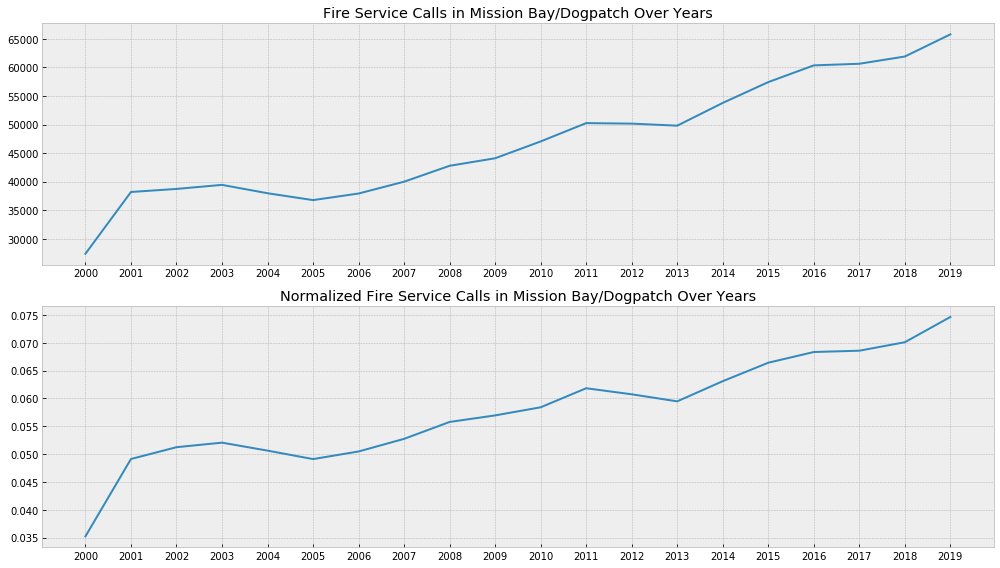

In [31]:
#Normalized Data by Population V2
mbdplt2019 = mbdp_fire[mbdp_fire['Call Year']<2020]

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdplt2019['Call Year'].unique(), mbdplt2019.sort_values('Call Year').groupby(['Call Year']).count()['Call Date'])
ax[0].set_xticks(mbdplt2019['Call Year'].unique())
ax[0].set_title('Fire Service Calls in Mission Bay/Dogpatch Over Years')
ax[1].plot(mbdplt2019['Call Year'].unique(), mbdplt2019.sort_values('Call Year').groupby('Call Year').sum()['Norm'])
ax[1].set_xticks(mbdplt2019['Call Year'].unique())
ax[1].set_title('Normalized Fire Service Calls in Mission Bay/Dogpatch Over Years')
# plt.savefig('Graphs/Fire_Calls_2000-2020.png', dpi=300)
plt.tight_layout()
plt.show()


In [ ]:
date_range = pd.date_range(start='2015-01-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()
labels = mbdpjul19.groupby(['Call Year','Call Month2']).count()['Call Date']

fig, ax = plt.subplots(2,1,figsize=(10,15))
ax[0].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month2']).count()['Call Date'])
ax[0].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[0].set_title(f'Fire Call Counts in 2019')
ax[0].set_xticks(mbdpjul19['Month-Year'].unique()[::3])
ax[0].set_xticklabels(mbdpjul19['Month-Year'].unique()[::3], rotation='vertical')
ax[0].legend(loc='best')
ax[1].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month2']).sum()['Norm'])
ax[1].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[1].set_title(f'Normalized Fire Call Counts in 2019')
ax[1].set_xticks(mbdpjul19['Month-Year'].unique()[::3])
ax[1].set_xticklabels(mbdpjul19['Month-Year'].unique()[::3], rotation='vertical')
ax[1].legend(loc='best')
# plt.savefig('Graphs/FireCalls2015-2020.png', dpi=300)
plt.tight_layout()

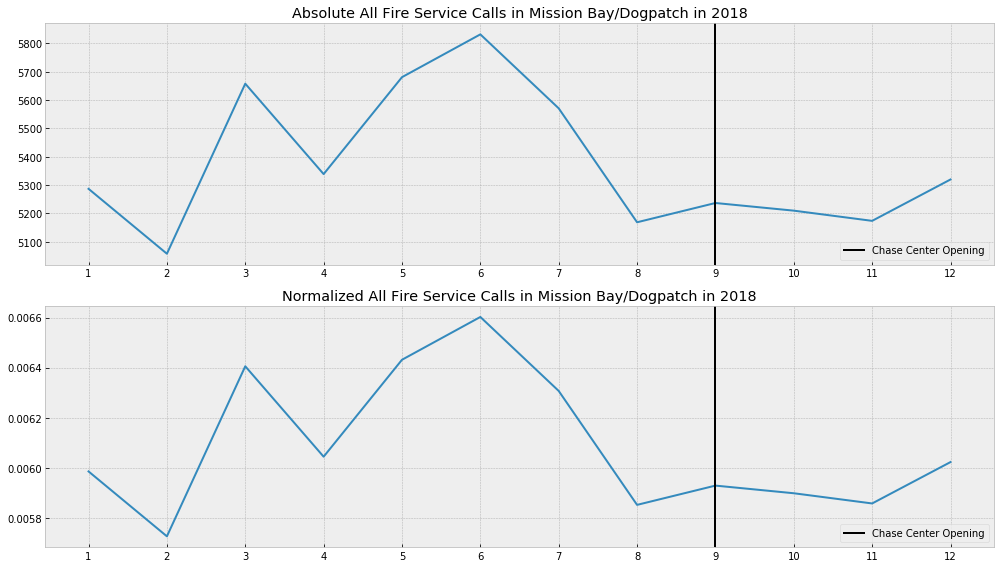

In [387]:
df = mbdp_fire[['Call Type','Call Type Group','Call Date','Call Month','Call Month2','Call Year', 'Month-Year',
                       'Address','Zipcode of Incident', "Norm"]][(
    mbdp_fire['Zipcode of Incident'].isin(zipcodes_of_interest))].sort_values('Call Date')
mbdp2019 = df[df['Call Year'] == 2018].sort_values('Call Date')

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month2').count()['Norm'])
ax[0].axvline(9,color='black',label='Chase Center Opening')
ax[0].set_xticks(mbdp2019['Call Month2'].unique())
ax[0].set_title('Absolute All Fire Service Calls in Mission Bay/Dogpatch in 2018')
ax[0].legend(loc='lower right')
ax[1].plot(mbdp2019['Call Month2'].unique(), mbdp2019.groupby('Call Month2').sum()['Norm'])
ax[1].axvline(9,color='black',label='Chase Center Opening')
ax[1].set_xticks(mbdp2019['Call Month'].unique())
ax[1].set_title('Normalized All Fire Service Calls in Mission Bay/Dogpatch in 2018')
ax[1].legend(loc='lower right')
plt.tight_layout()
# plt.savefig('Graphs/2018allfirecalls.png',dpi=300)
plt.show()

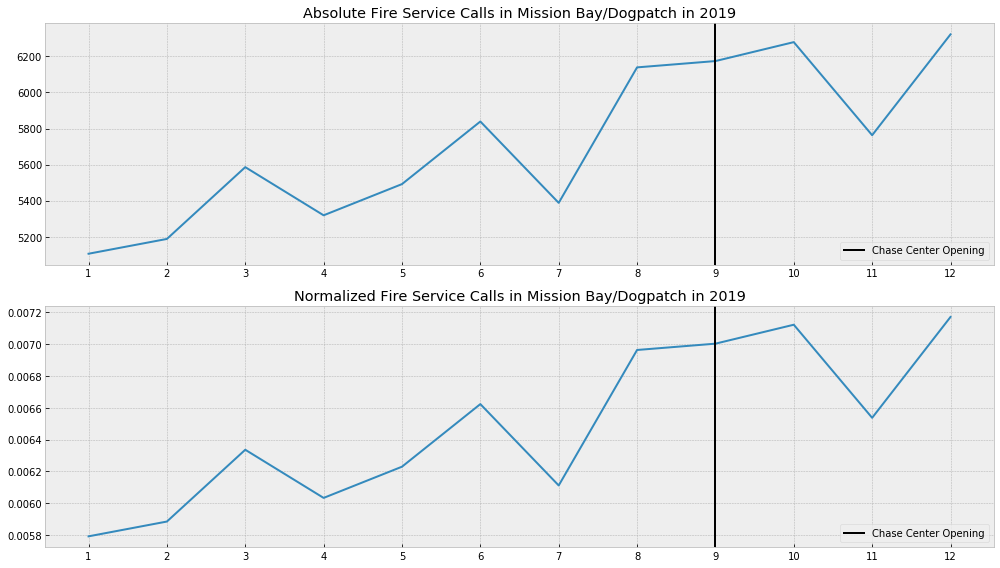

In [388]:
df = mbdp_fire[['Call Type','Call Type Group','Call Date','Call Month','Call Month2','Call Year', 'Month-Year',
                       'Address','Zipcode of Incident', "Norm"]][(
    mbdp_fire['Zipcode of Incident'].isin(zipcodes_of_interest))].sort_values('Call Date')
mbdp2019 = df[df['Call Year'] == 2019].sort_values('Call Date')

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month2').count()['Norm'])
ax[0].axvline(9,color='black',label='Chase Center Opening')
ax[0].set_xticks(mbdp2019['Call Month2'].unique())
ax[0].set_title('Absolute Fire Service Calls in Mission Bay/Dogpatch in 2019')
ax[0].legend(loc='lower right')
ax[1].plot(mbdp2019['Call Month2'].unique(), mbdp2019.groupby('Call Month2').sum()['Norm'])
ax[1].axvline(9,color='black',label='Chase Center Opening')
ax[1].set_xticks(mbdp2019['Call Month'].unique())
ax[1].set_title('Normalized Fire Service Calls in Mission Bay/Dogpatch in 2019')
ax[1].legend(loc='lower right')
plt.tight_layout()
# plt.savefig('Graphs/2019allfirecalls.png',dpi=300)
plt.show()

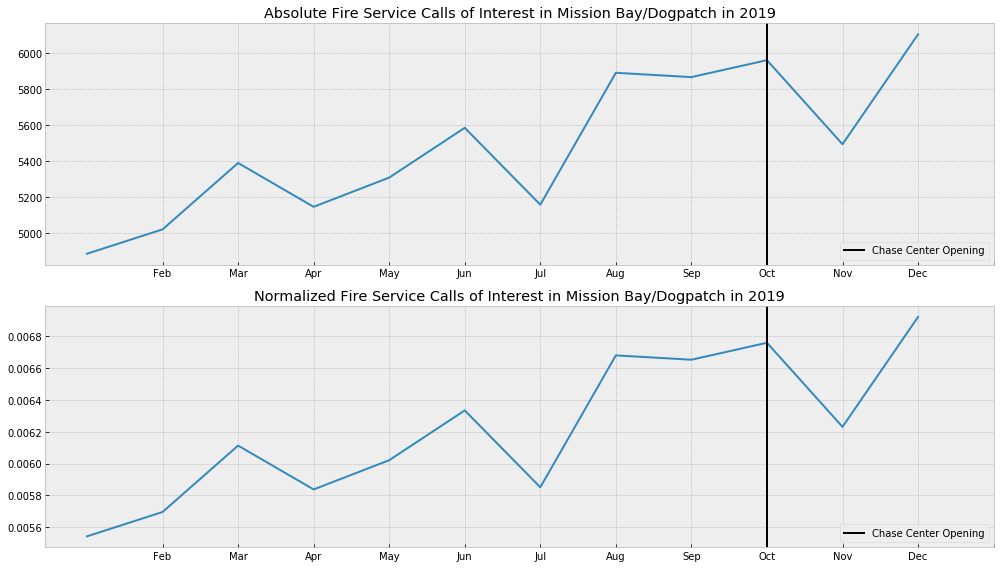

In [353]:
#Only looking at categories in "Calls of interest"
mbdp2019 = mbdp_fire[mbdp_fire['Call Year'] == 2019].sort_values('Call Date')

fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month2').count()['Norm'])
ax[0].axvline(9,color='black',label='Chase Center Opening')
ax[0].set_xticks(mbdp2019['Call Month2'].unique())
ax[0].set_title('Absolute Fire Service Calls of Interest in Mission Bay/Dogpatch in 2019')
ax[0].legend(loc='lower right')
ax[1].plot(mbdp2019['Call Month'].unique(), mbdp2019.groupby('Call Month2').sum()['Norm'])
ax[1].axvline(9,color='black',label='Chase Center Opening')
ax[1].set_xticks(mbdp2019['Call Month2'].unique())
ax[1].set_title('Normalized Fire Service Calls of Interest in Mission Bay/Dogpatch in 2019')
ax[1].legend(loc='lower right')
plt.tight_layout()
# plt.savefig('Graphs/2019firecallsofinterest.png',dpi=300)
plt.show()

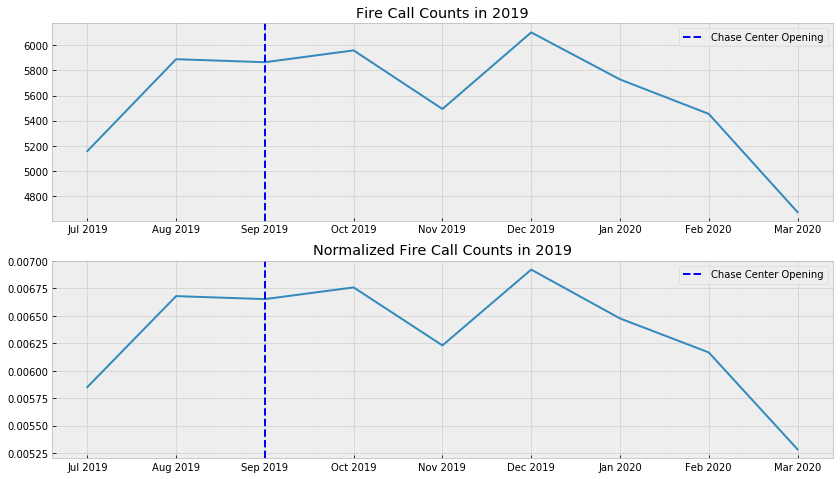

In [351]:
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()
labels = mbdpjul19.groupby(['Call Year','Call Month2']).count()['Call Date']

fig, ax = plt.subplots(2,1,figsize=(14,8))
ax[0].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month2']).count()['Call Date'])
ax[0].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[0].set_title(f'Normalized Fire Call Counts in Dogpatch/Mission Bay 2019-2020')
ax[0].set_xticks(mbdpjul19['Month-Year'].unique())
ax[0].legend(loc='best')
ax[1].plot(mbdpjul19['Month-Year'].unique(),mbdpjul19.groupby(['Call Year','Call Month2']).sum()['Norm'])
ax[1].axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
ax[1].set_title(f'Normalized Fire Call Counts in Dogpatch/Mission Bay 2019-2020')
ax[1].set_xticks(mbdpjul19['Month-Year'].unique())
ax[1].legend(loc='best')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


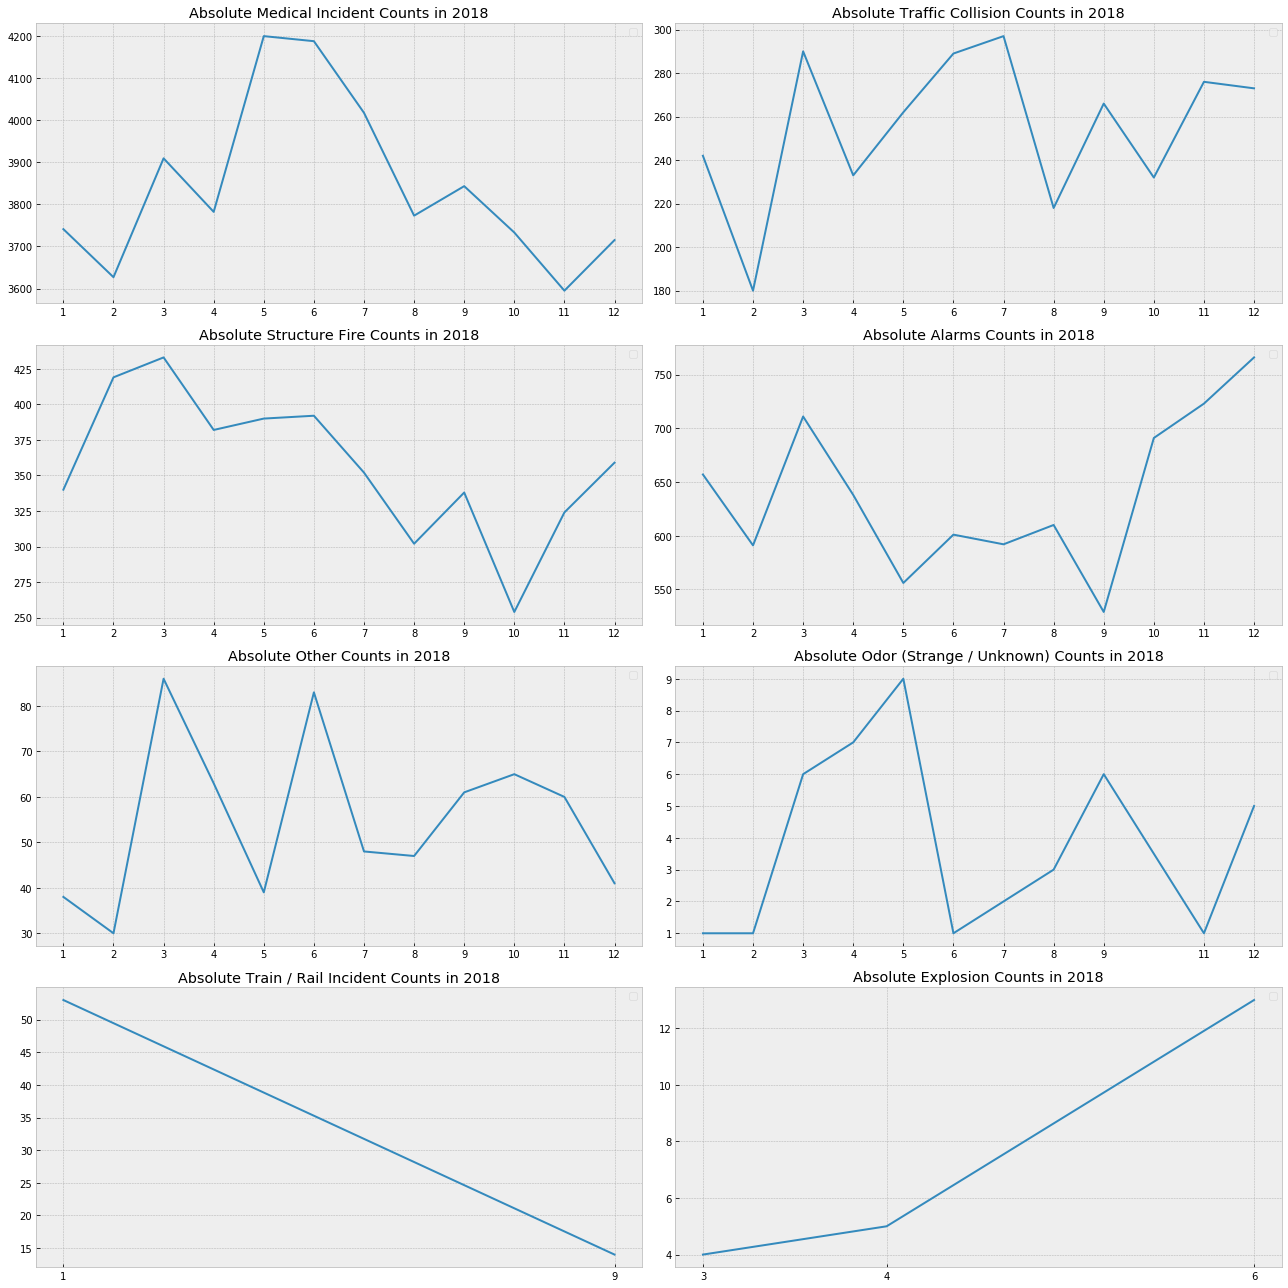

In [396]:
#Absolute
date_range = pd.date_range(start='2018-01-01', end='2018-12-31')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()

fig, axes = plt.subplots(4,2, figsize=(18,18))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[mbdpjul19['Call Type']==calls[ix]].sort_values('Call Date')
    ax.plot(graph['Call Month2'].unique(),graph.groupby(['Call Year','Call Month2']).count()['Call Date'])
#     ax.axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'Absolute {calls[ix]} Counts in 2018')
    ax.set_xticks(graph['Call Month2'].unique())
    ax.legend(loc='best')
    plt.tight_layout()

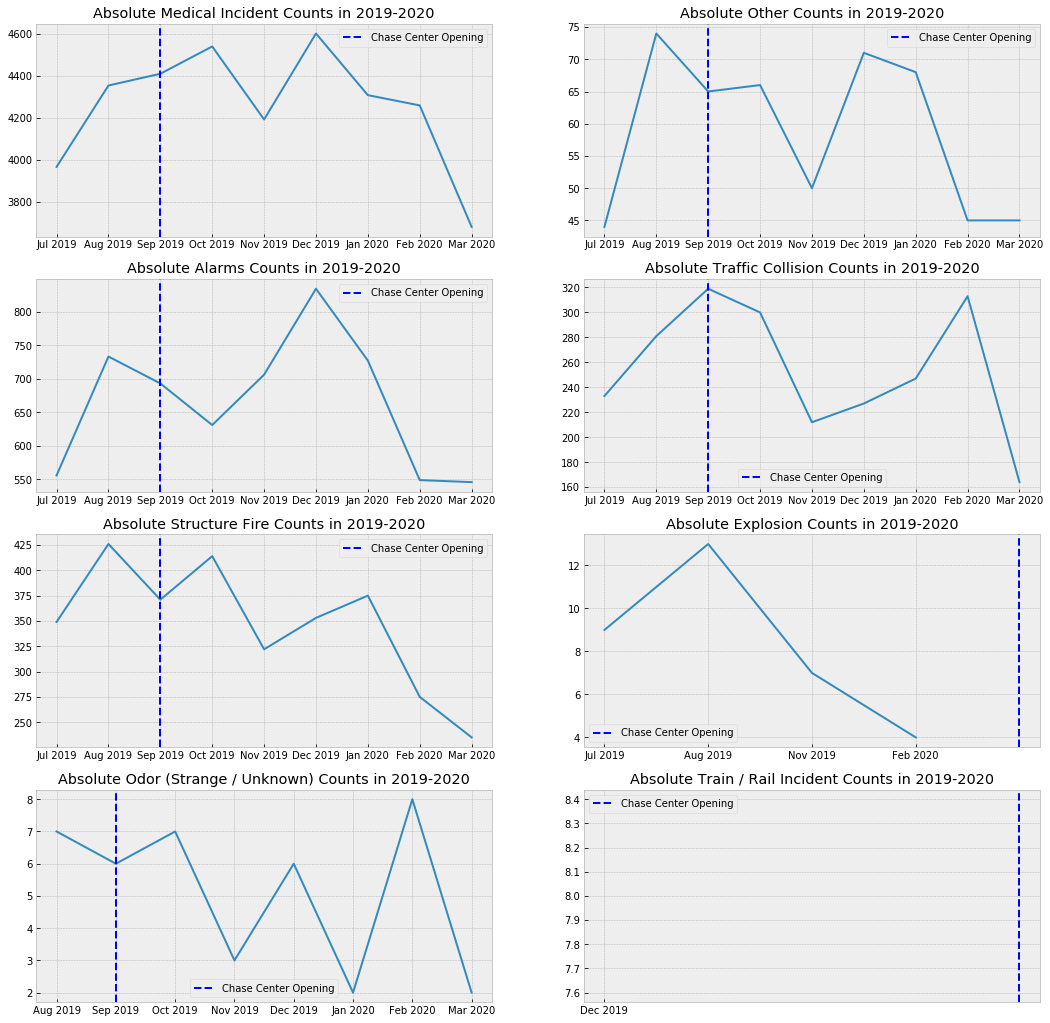

In [397]:
#Absolute
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()

fig, axes = plt.subplots(4,2, figsize=(18,18))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[mbdpjul19['Call Type']==calls[ix]].sort_values('Call Date')
    ax.plot(graph['Month-Year'].unique(),graph.groupby(['Call Year','Call Month2']).count()['Call Date'])
    ax.axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'Absolute {calls[ix]} Counts in 2019-2020')
    ax.set_xticks(graph['Month-Year'].unique())
    ax.legend(loc='best')

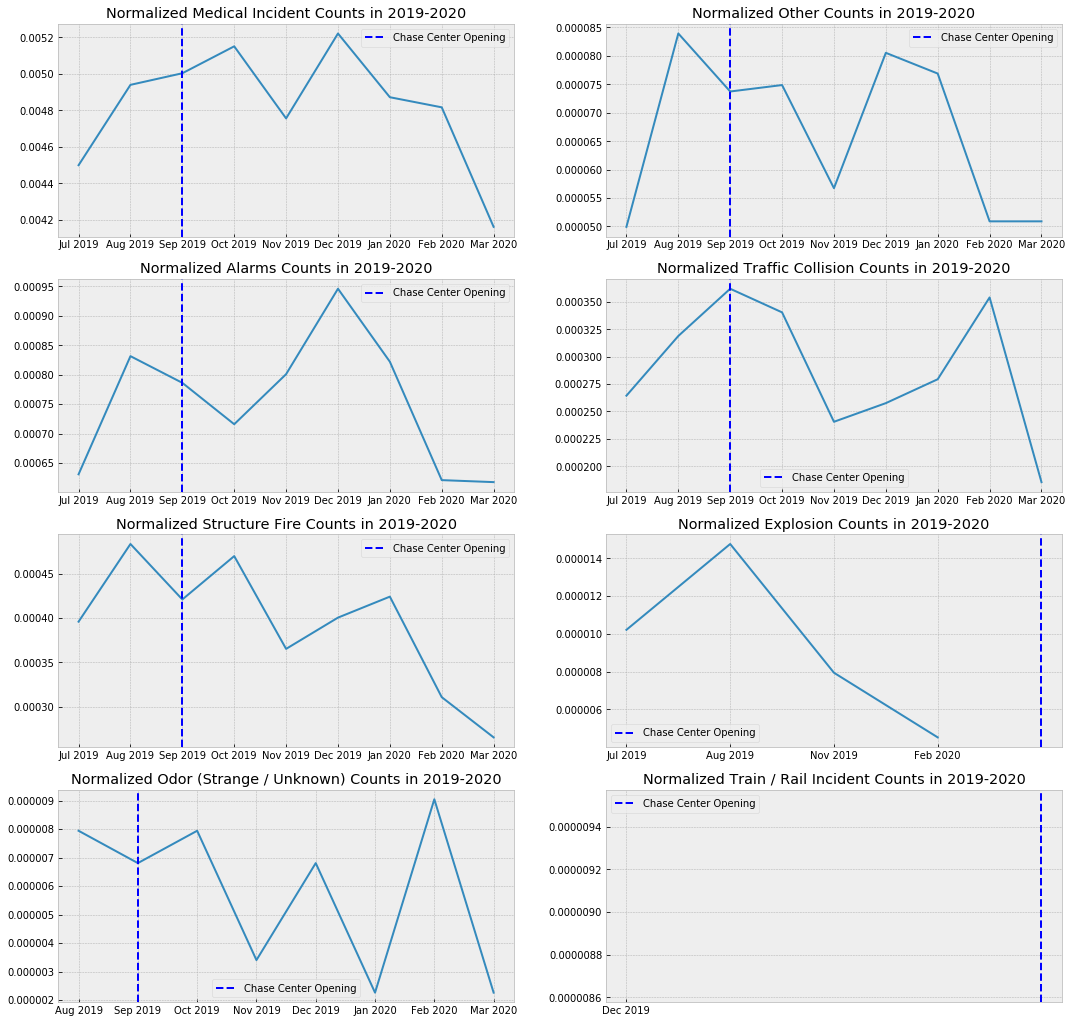

In [398]:
#Normalized, cannot sort by 
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
calls = mbdpjul19['Call Type'].unique()

fig, axes = plt.subplots(4,2, figsize=(18,18))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[mbdpjul19['Call Type']==calls[ix]].sort_values('Call Date')
    ax.plot(graph['Month-Year'].unique(),graph.groupby(['Call Year','Call Month2']).sum()['Norm'])
    ax.axvline('Sep 2019', ls='--',color='blue', label='Chase Center Opening')
    ax.set_title(f'Normalized {calls[ix]} Counts in 2019-2020')
    ax.set_xticks(graph['Month-Year'].unique())
    ax.legend(loc='best')


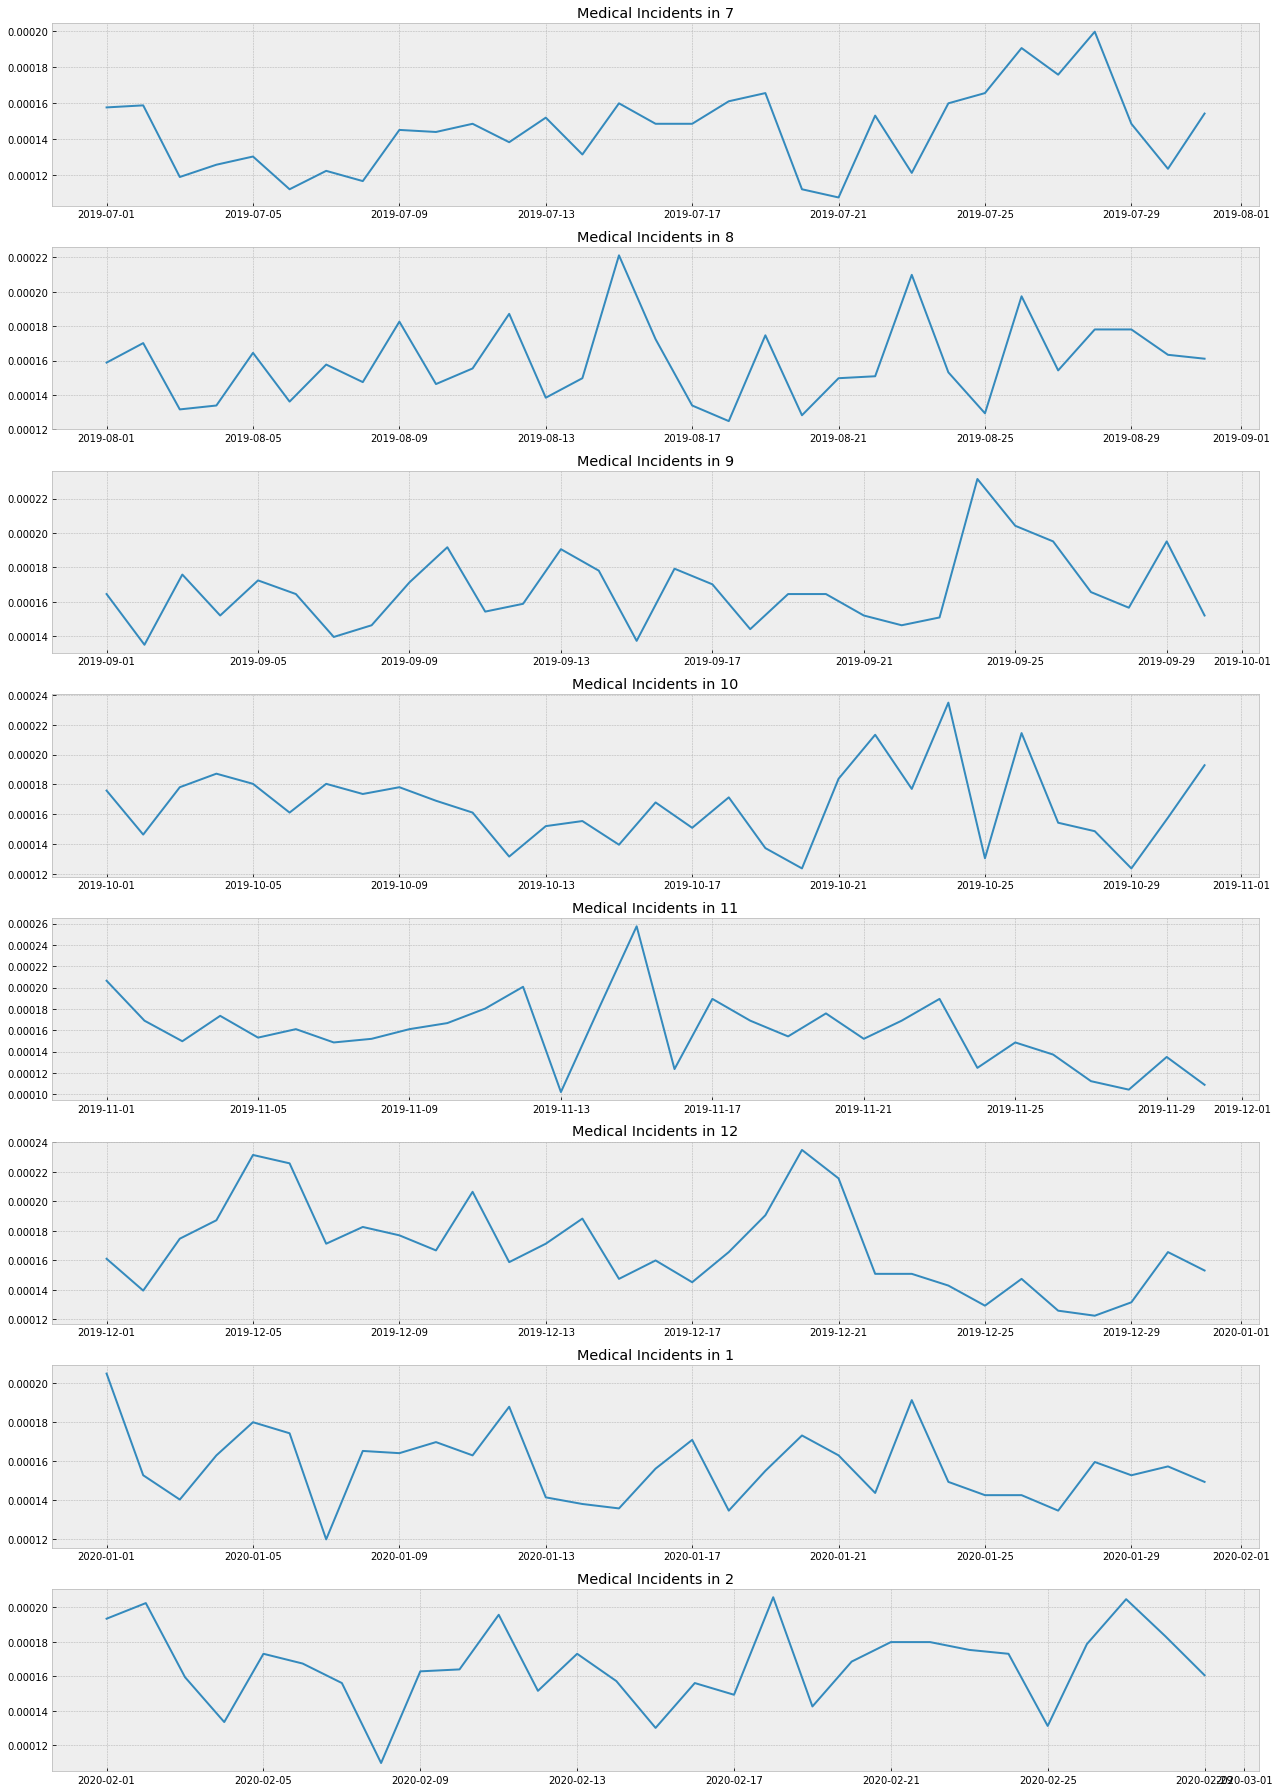

In [205]:
#Next step: Subplots per month for key indicators of interest: Medical Incidents, Alarms, Traffic Collisons
date_range = pd.date_range(start='2019-07-01', end='2020-04-01')
mbdpjul19 = mbdp_fire[mbdp_fire['Call Date'].isin(date_range)]
months = [7,8,9,10,11,12,1,2]
calls = ['Medical Incidents', 'Traffic Collisons']

fig, axes = plt.subplots(8,1, figsize=(18,25))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[(mbdpjul19['Call Month2']==months[ix]) & (mbdpjul19['Call Type']=='Medical Incident')].sort_values('Call Date')
    ax.plot(graph['Call Date'].unique(),graph.groupby('Call Date').sum()['Norm'])
    ax.set_title(f'Medical Incidents in {months[ix]}')
fig.tight_layout()

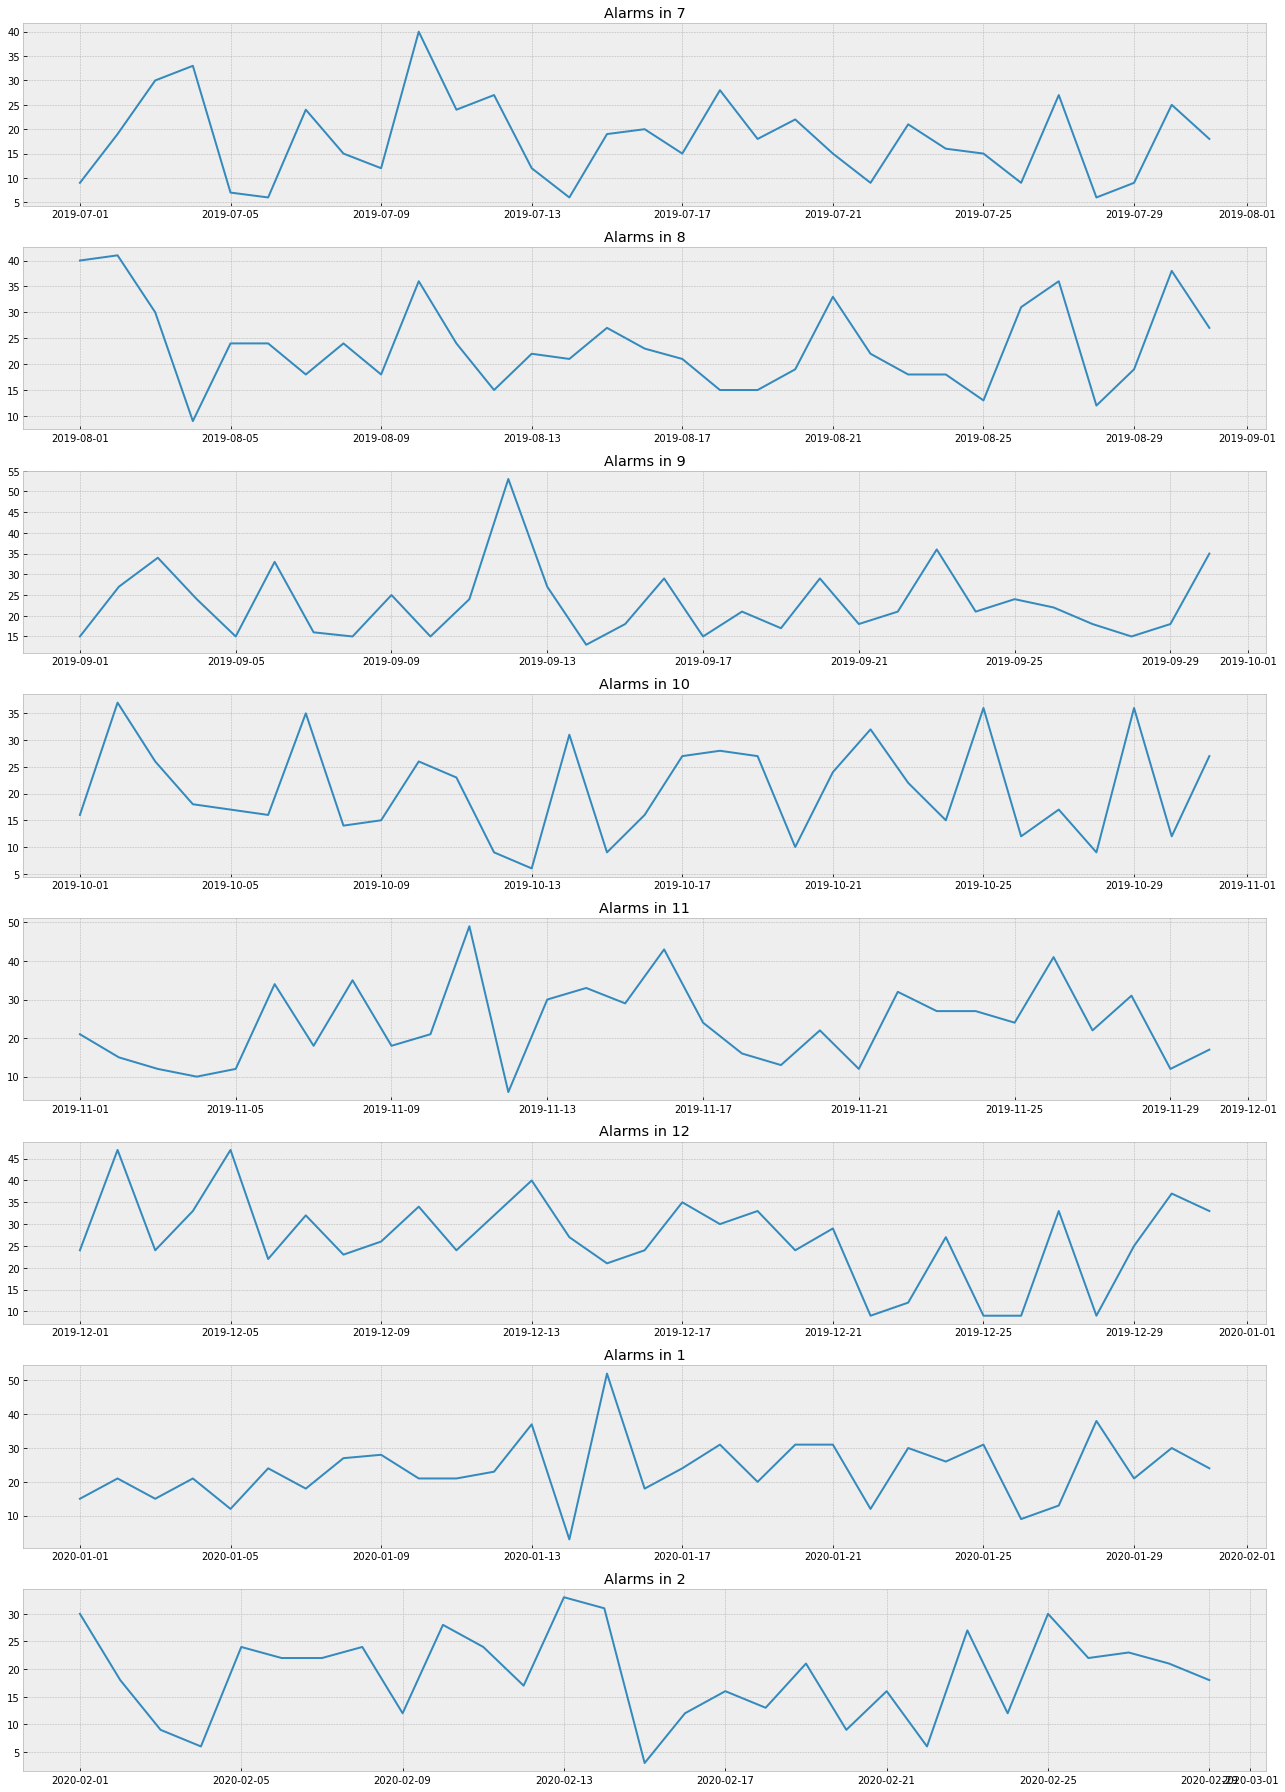

In [196]:
fig, axes = plt.subplots(8,1, figsize=(18,25))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[(mbdpjul19['Call Month2']==months[ix]) & (mbdpjul19['Call Type']=='Alarms')].sort_values('Call Date')
    ax.plot(graph['Call Date'].unique(),graph.groupby('Call Date').count()['Call Month'])
    ax.set_title(f'Alarms in {months[ix]}')
fig.tight_layout()

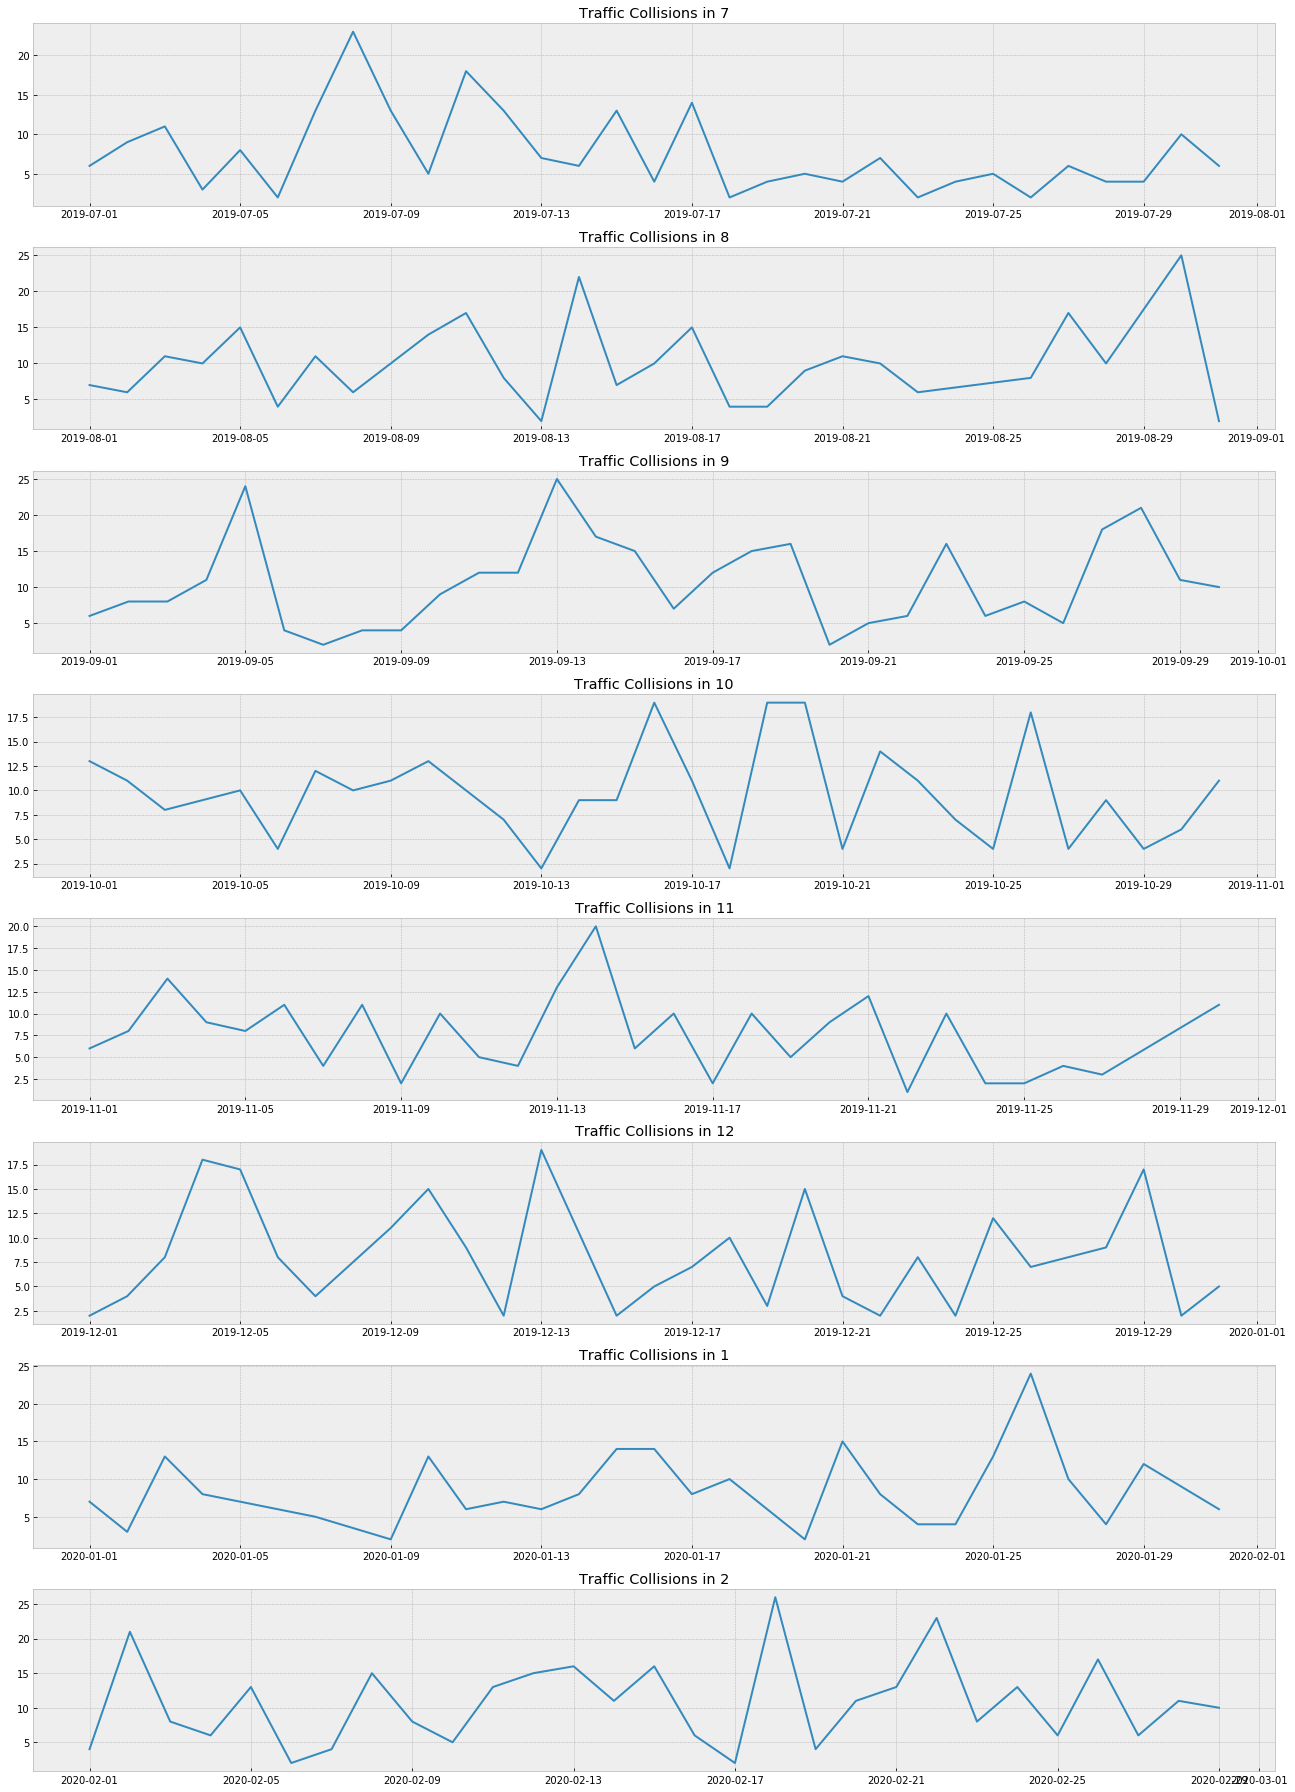

In [197]:
fig, axes = plt.subplots(8,1, figsize=(18,25))
for ix, ax in enumerate(axes.flatten()):
    graph = mbdpjul19[(mbdpjul19['Call Month2']==months[ix]) & (mbdpjul19['Call Type']=='Traffic Collision')].sort_values('Call Date')
    ax.plot(graph['Call Date'].unique(),graph.groupby('Call Date').count()['Call Month'])
    ax.set_title(f'Traffic Collisions in {months[ix]}')
fig.tight_layout()

## Takeaways
Per month, fire services are sporatic, averaging X per month. We will look specifically at Medical Incidents, Alarms, and Traffic Collisions.

**Hypothesis Testing:** 

Null Hypothesis: Average per capita rate of fire service calls on game days will be the same as non-game days

Alternative Hypothesis: Average per capita rate of fire service calls on game days will be higher than non-game days

**Test Method 1: Non-Parametric**

**Test Method 2: Sample Means should follow normal distribution**

Question: Should comparison be after opening, or before opening?

In [32]:
#Import chase event dates
chase_events=pd.read_csv('Chase_Stadium_Events')
chase_events = chase_events.rename(columns = {'date':'Call Date'})
chase_events['Call Date'] = pd.to_datetime(chase_events['Call Date'])
event_dates = chase_events['Call Date'].unique()
chase_events =chase_events[['Call Date','fields.type']]
chase_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
Call Date      77 non-null datetime64[ns]
fields.type    77 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 1.3+ KB


In [33]:
#Only looking at categories in "Calls of interest"
date_range = pd.date_range(start='2019-09-01', end='2020-04-01')
mbdp2020 = mbdp_fire[(mbdp_fire['Call Date'].isin(date_range))].sort_values('Call Date')
events2020 = mbdp2020[mbdp2020['Call Date'].isin(event_dates)]
notevents2020 = mbdp2020[~mbdp2020['Call Date'].isin(event_dates)]
events2020 = pd.merge(chase_events, events2020, on='Call Date', how='left')
events2020[events2020['Call Date'].isin(['2019-12-21', 
                                         '2020-01-11'])].groupby(['Call Date', 'Call Type','Call Type Group', 
                                                                  'Received DtTm']).count().sort_values('Call Month',ascending=False)

fields.type  \
Call Date  Call Type        Call Type Group              Received DtTm                         
2020-01-11 Structure Fire   Alarm                        01/11/2020 02:16:18 PM           28   
                                                         01/11/2020 07:33:10 PM           20   
2019-12-21 Medical Incident Non Life-threatening         12/21/2019 04:39:07 PM           12   
                            Potentially Life-Threatening 12/21/2019 11:23:46 PM           10   
                                                         12/21/2019 09:15:02 PM           10   
...                                                                                      ...   
2020-01-11 Medical Incident Non Life-threatening         01/11/2020 04:08:53 PM            2   
                                                         01/11/2020 03:18:06 PM            2   
                                                         01/11/2020 02:28:49 PM            2   
                                                         01/11/2020 01:41:47 PM            2   
                                                         01/11/2020 12:52:32 AM            2   

                                                                                 Call Month  \
Call Date  Call Type        Call Type Group              Received DtTm                        
2020-01-11 Structure Fire   Alarm                        01/11/2020 02:16:18 PM          28   
                                                         01/11/2020 07:33:10 PM          20   
2019-12-21 Medical Incident Non Life-threatening         12/21/2019 04:39:07 PM          12   
                            Potentially Life-Threatening 12/21/2019 11:23:46 PM          10   
                                                         12/21/2019 09:15:02 PM          10   
...                                                                                     ...   
2020-01-11 Medical Incident Non Life-threatening         01/11/2020 04:08:53 PM           2   
                                                         01/11/2020 03:18:06 PM           2   
                                                         01/11/2020 02:28:49 PM           2   
                                                         01/11/2020 01:41:47 PM           2   
                                                         01/11/2020 12:52:32 AM           2   

                                                                                 Call Year  \
Call Date  Call Type        Call Type Group              Received DtTm                       
2020-01-11 Structure Fire   Alarm                        01/11/2020 02:16:18 PM         28   
                                                         01/11/2020 07:33:10 PM         20   
2019-12-21 Medical Incident Non Life-threatening         12/21/2019 04:39:07 PM         12   
                            Potentially Life-Threatening 12/21/2019 11:23:46 PM         10   
                                                         12/21/2019 09:15:02 PM         10   
...                                                                                    ...   
2020-01-11 Medical Incident Non Life-threatening         01/11/2020 04:08:53 PM          2   
                                                         01/11/2020 03:18:06 PM          2   
                                                         01/11/2020 02:28:49 PM          2   
                                                         01/11/2020 01:41:47 PM          2   
                                                         01/11/2020 12:52:32 AM          2   

                                                                                 Month-Year  \
Call Date  Call Type        Call Type Group              Received DtTm                        
2020-01-11 Structure Fire   Alarm                        01/11/2020 02:16:18 PM          28   
                                                         01/11/2020 07:33:10 PM         

In [34]:
events2020.groupby(['Call Date','fields.type']).count()['Norm']
mean_events = events2020['Norm'].count()/len(events2020['Call Date'].unique())
sd_events = np.std(events2020.groupby('Call Date').count()['Norm'])
print(f'Event Dates at Chase Stadium have on average {mean_events} Fire Calls per day, {sd_events} SD')

Event Dates at Chase Stadium have on average 198.92 Fire Calls per day, 49.81318700906417 SD


In [35]:
notevents_group = notevents2020.groupby('Call Date').count()['Norm']
mean_not_events = notevents2020['Norm'].count()/len(notevents2020['Call Date'].unique())
sd_not_events = np.std(notevents2020.groupby('Call Date').count()['Norm'])
print(f'Non-Event Dates at Chase Stadium have on average {mean_not_events} Fire Calls per day, {sd_not_events} SD')

Non-Event Dates at Chase Stadium have on average 184.8955223880597 Fire Calls per day, 27.531601559455332 SD


In [325]:
events_group = events2020.groupby(['Call Date']).count()['Norm']
notevents_group = notevents2020.groupby('Call Date').count()['Norm']
stats.mannwhitneyu(events_group, notevents_group, alternative="greater")
#Based on the Mannwhitney Test Result, events at the Chase Stadium due have higher Fire Service Calls in Dogpatch

MannwhitneyuResult(statistic=5770.0, pvalue=0.03790987564603979)

## With the high SD, it looks like there could be outliers in the distribution

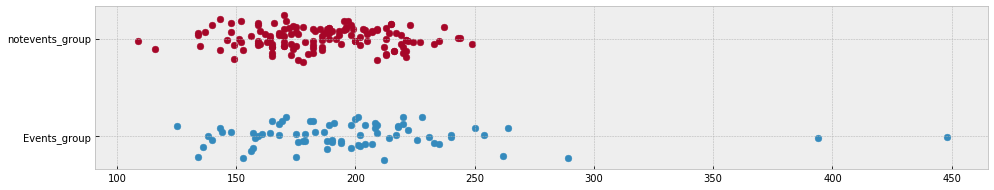

In [534]:
#Let's look into those outliers for CLT
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(events_group, np.repeat(0, len(events_group)) + np.random.normal(0, 0.1, len(events_group)), s=45)
ax.scatter(notevents_group, np.repeat(1, len(notevents_group)) + np.random.normal(0, 0.1, len(notevents_group)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Events_group", "notevents_group"])
# plt.savefig('Graphs/EventsVsNonScatter_fire.png',dpi=300)

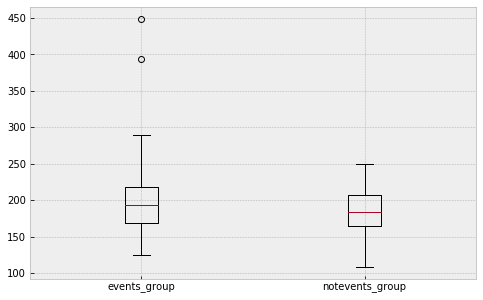

In [580]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([events_group, notevents_group])
ax.set_xticks([1,2])
ax.set_xticklabels(["events_group", "notevents_group"])
# plt.savefig('Graphs/EventsVsNonBox_fire.png',dpi=300)

## Removing the Outliers
Note: 12/21/2019 & 1/11/2020 high counts of X....XXX If more time, I would look into these events more. Would also look into times of events.

In [558]:
events2020.groupby('Call Date').count()['Norm'].sort_values(ascending=False)

Call Date
2019-12-21    448
2020-01-11    394
2019-12-05    289
2019-11-15    264
2020-03-05    262
             ... 
2019-12-28    140
2020-01-14    138
2020-02-08    136
2019-11-29    134
2019-11-27    125
Name: Norm, Length: 75, dtype: int64

In [44]:
#Removing 2 outliers from events
new_events2020 = events2020[~events2020['Call Date'].isin(['2019-12-21', '2020-01-11', '2019-12-05'])]
new_events_group = new_events2020.groupby(['Call Date']).count()['Norm']
mean_events_new = new_events2020['Norm'].count()/len(new_events2020['Call Date'].unique())
sd_events_new = np.std(new_events2020.groupby('Call Date').count()['Norm'])
print(f'Event Dates at Chase Stadium have on average {mean_events_new} Fire Calls per day, {sd_events_new} SD')

Event Dates at Chase Stadium have on average 191.5 Fire Calls per day, 32.04293994002423 SD


In [48]:
## Need to remove outliers in Events & outliers in Not-Events (Mid-March+ after shelter in place)
date_range = pd.date_range(start='2020-03-12', end='2020-04-01')
new_notevents2020 = notevents2020[~notevents2020['Call Date'].isin(date_range)]
new_notevents_group = new_notevents2020.groupby(['Call Date']).count()['Norm']
mean_notevents_new = new_notevents2020['Norm'].count()/len(new_notevents2020['Call Date'].unique())
sd_notevents_new = np.std(new_notevents2020.groupby('Call Date').count()['Norm'])
print(f'Non-Event Dates at Chase Stadium have on average {mean_notevents_new} Fire Calls per day, {sd_notevents_new}')

Non-Event Dates at Chase Stadium have on average 188.51694915254237 Fire Calls per day, 25.899981366018903


In [49]:
#Bootstrap samples to get the sample means distribution
events_means=[]
notevents_means=[]
for num in range(1000):
    events_means.append(np.mean([np.random.choice(new_events_group, replace=True) for x in range(100)]))
    notevents_means.append(np.mean([np.random.choice(new_notevents_group, replace=True) for x in range(100)]))

In [50]:
standard_error = sd_notevents_new/(1000**0.5)
notevents_dist = stats.norm(loc=mean_notevents_new,scale=standard_error)
events_dist = stats.norm(loc=mean_events_new,scale=sd_events_new/(1000**0.5))
print(f'Non-Event Dates have {np.mean(notevents_means)} Calls per day, Event Dates have {np.mean(events_means)} Calls per day')

Non-Event Dates have 188.38081 Calls per day, Event Dates have 191.35537 Calls per day


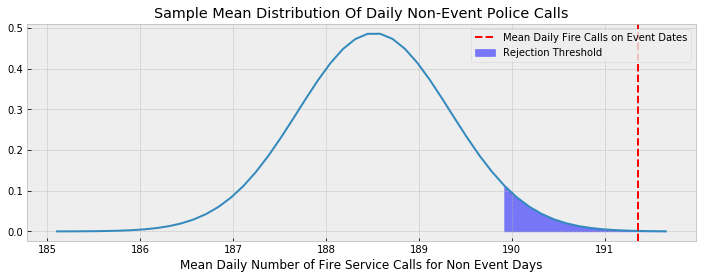

In [51]:
x=np.linspace(np.mean(notevents_means)-4*standard_error,np.mean(notevents_means)+4*standard_error,50)
critical_val = notevents_dist.ppf(0.95)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x,notevents_dist.pdf(x))
ax.axvline(np.mean(events_means), color='red',ls='--', label='Mean Daily Fire Calls on Event Dates')
ax.fill_between(x, notevents_dist.pdf(x), 
                where=(x >= critical_val), color="blue", alpha=0.5, label='Rejection Threshold')
ax.set_xlabel('Mean Daily Number of Fire Service Calls for Non Event Days')
ax.legend(loc='upper right')
ax.set_title('Sample Mean Distribution Of Daily Non-Event Police Calls')
# plt.savefig('Graphs/EventsVsNonHypotheisTest_Fire.png',dpi=300)

In [ ]:
#To Do: Calculate p-value
